**<h3>⭕️ Name: Anshul Mankar | Project: Exploratory Data Analysis & Sentiment-Analysis | Date: 26-06-2024 ⭕️</h3>**

In [1]:
!pip install vaderSentiment
!pip install Wordcloud
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

**<h3>Reading Data from file ✅</h3>**

In [3]:
data1 = pd.read_csv ('books_data.csv')
data2 = pd.read_csv ('Books_rating.csv')

In [4]:
data1.head(5)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [5]:
data2.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


**<h3>Data Pre-Processing ✅</h3>**

In [7]:
books = pd.merge(data1,data2, on = 'Title')
books.shape

(3000000, 19)

[ retrieving useful columns ]

In [9]:
df = books[['Title','review/score','review/text','authors','categories','ratingsCount']]

[ eradicating duplicates ]

In [11]:
df.drop_duplicates(inplace = True)
df.shape

C:\Users\ANSHUL\AppData\Local\Temp\ipykernel_9524\3208856916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


(2617289, 6)

In [12]:
df.isna().sum()

Title               207
review/score          0
review/text           8
authors          350198
categories       465848
ratingsCount    1234897
dtype: int64

[ dropping null values ]

In [14]:
df.dropna(inplace=True)
df.isna().sum()

C:\Users\ANSHUL\AppData\Local\Temp\ipykernel_9524\3486782518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Title           0
review/score    0
review/text     0
authors         0
categories      0
ratingsCount    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325891 entries, 47 to 2999995
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Title         1325891 non-null  object 
 1   review/score  1325891 non-null  float64
 2   review/text   1325891 non-null  object 
 3   authors       1325891 non-null  object 
 4   categories    1325891 non-null  object 
 5   ratingsCount  1325891 non-null  float64
dtypes: float64(2), object(4)
memory usage: 70.8+ MB


In [16]:
df.shape

(1325891, 6)

-- reducing running time by practicing on fraction of dataset --

In [18]:
data= df.sample (15000)
data.shape

(15000, 6)

In [19]:
data['authors'] = data['authors'].str.extract(r'\'(.*)\'')

-- similarly removing brackets & colons from categories --

In [21]:
data['categories'] = data['categories'].str.extract(r'\'(.*)\'')

-- counting review lengths --

In [23]:
data['word_count'] = data['review/text'].apply(lambda x: len(x.split(' ')))

In [24]:
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,word_count
2366645,A separate peace;: A novel,4.0,The book is very vital. The diction and syntax...,John Knowles,Fiction,6.0,76
441032,Dun Lady's Jess,5.0,"Apart from the Harry Potter books, I've read f...",Doranna Durgin,Fiction,21.0,266
1787930,Eddie Kantar Teaches Modern Bridge Defense,3.0,It was not suitable for my purposes- I am teac...,"Eddie Kantar', 'Edwin B. Kantar",Games & Activities,1.0,24
826636,Wicca for Beginners: Fundamentals of Philosoph...,5.0,Very good reading to start out with. I keep go...,Thea Sabin,"Body, Mind & Spirit",12.0,16
1040825,"That Was Then, This Is Now",5.0,"During my 8th grade year, my english class rea...",S. E. Hinton,Young Adult Fiction,27.0,59


In [25]:
## data.to_csv('sample.csv', index=False)

**<h2>[ EDA ] ✅</h2>**

**<h3>🟢 Highest Rated Books with over 3500 ratings each Book </h3>**

<function matplotlib.pyplot.show(close=None, block=None)>

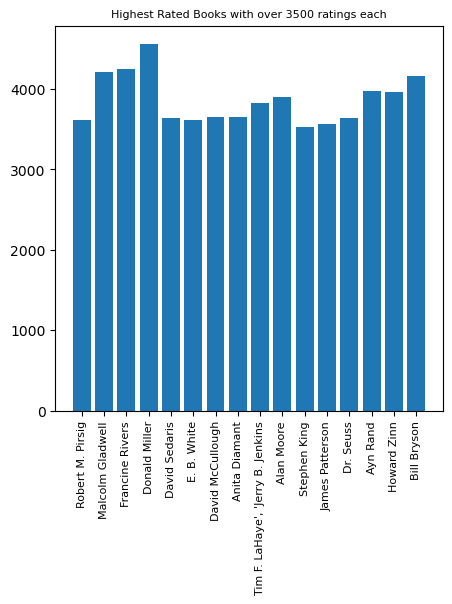

In [28]:
plt.figure(figsize = (5,5))
rating_counts = data[data['ratingsCount'] > 3500] [['authors','ratingsCount']].drop_duplicates()
plt.bar(rating_counts['authors'],rating_counts['ratingsCount'])
plt.title('Highest Rated Books with over 3500 ratings each', fontsize=8,)
plt.xticks(rotation='vertical', fontsize=8)
plt.show        


**<h3>🟢 Allocation of Books based on Genre</h3>**

<function matplotlib.pyplot.show(close=None, block=None)>

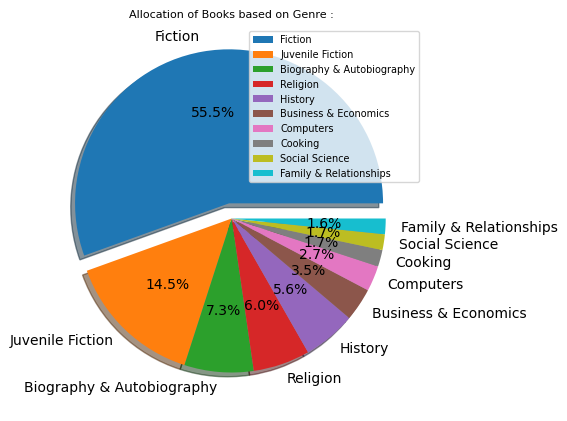

In [30]:
plt.figure(figsize=(5,5))
labels=['Fiction','Juvenile Fiction','Biography & Autobiography','Religion','History','Business & Economics','Computers','Cooking','Social Science','Family & Relationships']
plt.pie(data['categories'].value_counts().head(10),explode=(0.1,0,0,0,0,0,0,0,0,0), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Allocation of Books based on Genre :', fontsize=8)
plt.axis('off')
plt.legend(fontsize=7, loc='upper right')
plt.show

**<h3>🟢 Most recurring word in over 3 rated Reviews</h3>**

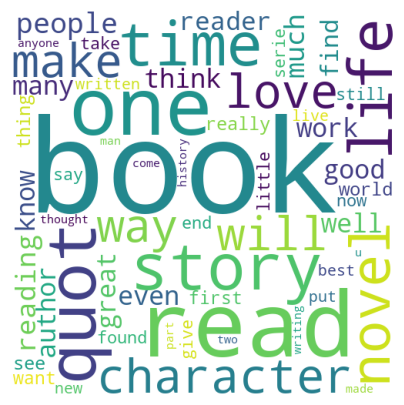

In [32]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(data[data['review/score'] > 3]['review/text'].str.cat(sep=" "))

plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(spam_wc)

**<h3>🟢 Most Reviewed Books :</h3>**

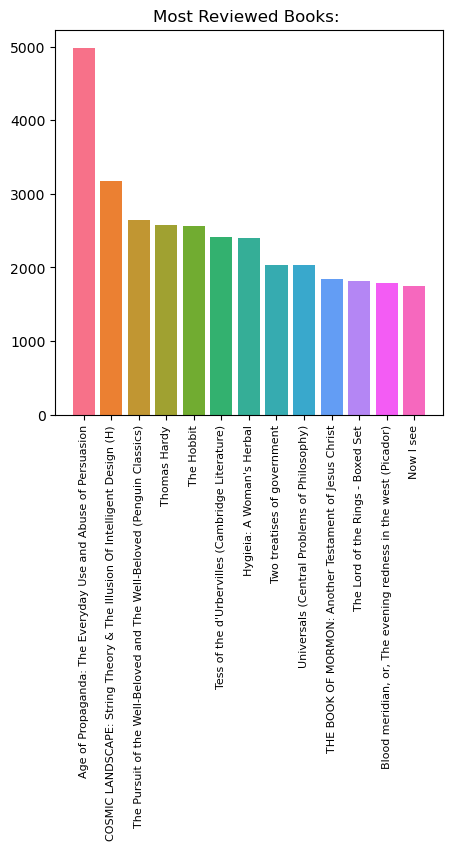

In [34]:
plt.figure(figsize=(5, 5))
cou = data[data['word_count'] > 1707][['Title', 'word_count']].sort_values(by='word_count', ascending=False)
colors = sns.color_palette('husl', n_colors=len(cou))
bars = plt.bar(cou['Title'], cou['word_count'], color=colors)
plt.title('Most Reviewed Books: ', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.show()

**<h3>🟢 Top 10 Authors with 5 star Ratings</h3>**

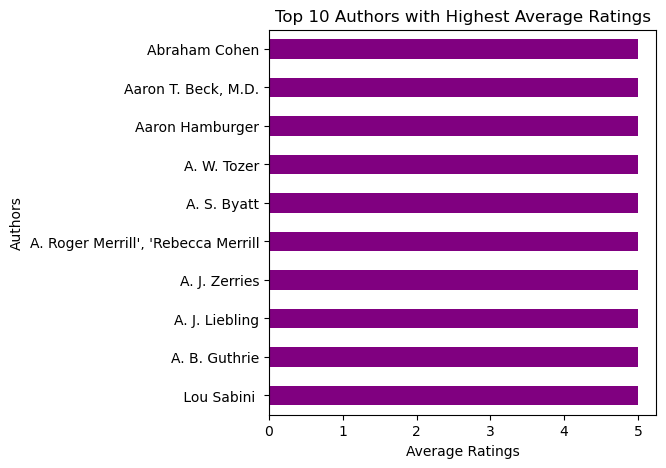

In [36]:
# Convert 'review/score' column to numeric, coercing errors to NaN
data['review/score'] = pd.to_numeric(data['review/score'], errors='coerce')

# Group by 'authors', compute the mean of 'review/score', and plot the top 10 authors
top_authors = data.groupby('authors')['review/score'].mean().nlargest(10)
top_authors.plot(kind='barh', figsize=(5, 5), color='purple')
plt.title('Top 10 Authors with Highest Average Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Authors')
plt.show()

**<h3>🟢 Top 10 Authors with Least Ratings</h3>**

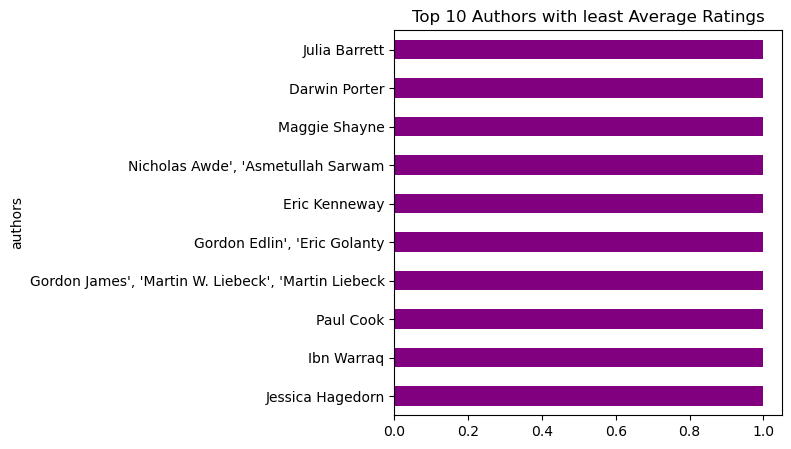

In [38]:
average_scores_by_author = data.groupby('authors')['review/score'].mean()

bottom_10_authors = average_scores_by_author.sort_values(ascending=True).head(10)

bottom_10_authors.plot(kind='barh', figsize=(5,5), color='purple')

plt.title('Top 10 Authors with least Average Ratings', fontsize=12)

plt.show()

**<h3>🟢 Number of Books written by Authors</h3>**

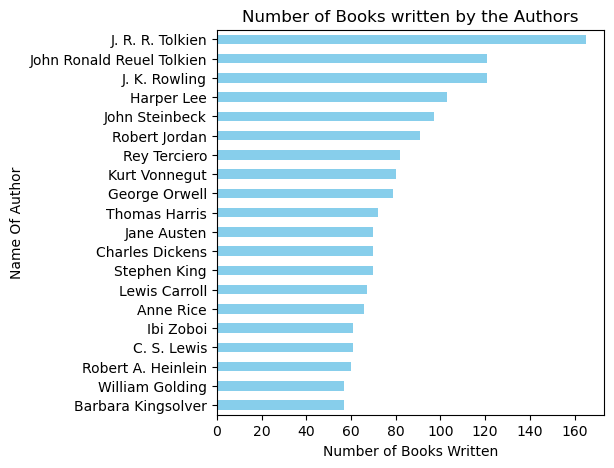

In [40]:
data['authors'].value_counts().head(20).sort_values(ascending = True).plot(kind='barh', figsize=(5,5), color='skyblue')
plt.title('Number of Books written by the Authors', fontsize = 12)
plt.ylabel('Name Of Author')
plt.xlabel('Number of Books Written')
plt.show()

**<h2>[Sentiment Analysis] ✅</h2>**

In [343]:
! pip install vaderSentiment

In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [44]:
data.head(2)

,Title,review/score,review/text,authors,categories,ratingsCount,word_count
2366645,A separate peace;: A novel,4.0,The book is very vital. The diction and syntax...,John Knowles,Fiction,6.0,76
441032,Dun Lady's Jess,5.0,"Apart from the Harry Potter books, I've read f...",Doranna Durgin,Fiction,21.0,266


In [45]:
# Lower casing the reviews
data['clean_reviews'] = data['review/text'].str.lower()
# Calculating Polarity score of reviews
data['score'] = data['clean_reviews'].apply(lambda review: vader.polarity_scores(review))
# Extracting compound column
data['compound']  = data['score'].apply(lambda score_dict: score_dict['compound'])

In [46]:
data['Sentiment'] = data['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x < -0.05 else 'neutral')
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,word_count,clean_reviews,score,compound,Sentiment
2366645,A separate peace;: A novel,4.0,The book is very vital. The diction and syntax...,John Knowles,Fiction,6.0,76,the book is very vital. the diction and syntax...,"{'neg': 0.029, 'neu': 0.74, 'pos': 0.231, 'com...",0.9553,positive
441032,Dun Lady's Jess,5.0,"Apart from the Harry Potter books, I've read f...",Doranna Durgin,Fiction,21.0,266,"apart from the harry potter books, i've read f...","{'neg': 0.024, 'neu': 0.772, 'pos': 0.204, 'co...",0.9962,positive
1787930,Eddie Kantar Teaches Modern Bridge Defense,3.0,It was not suitable for my purposes- I am teac...,"Eddie Kantar', 'Edwin B. Kantar",Games & Activities,1.0,24,it was not suitable for my purposes- i am teac...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
826636,Wicca for Beginners: Fundamentals of Philosoph...,5.0,Very good reading to start out with. I keep go...,Thea Sabin,"Body, Mind & Spirit",12.0,16,very good reading to start out with. i keep go...,"{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",0.4927,positive
1040825,"That Was Then, This Is Now",5.0,"During my 8th grade year, my english class rea...",S. E. Hinton,Young Adult Fiction,27.0,59,"during my 8th grade year, my english class rea...","{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'comp...",0.9267,positive


**<h3>Distribution of Negative, Neutral & positive Sentiment in whole corpus ✅</h3>**

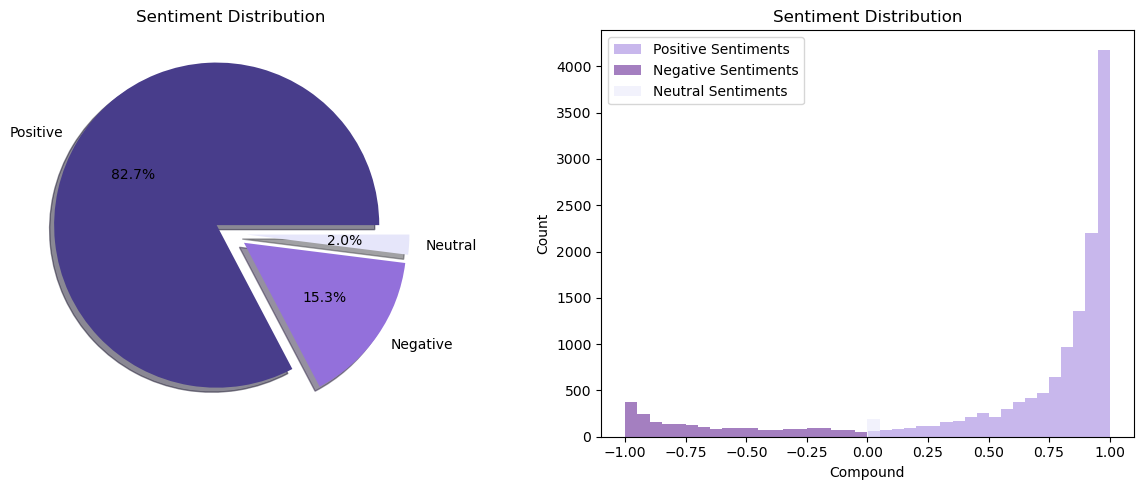

In [48]:
import matplotlib.pyplot as plt

#subplots with 1 row and 2 columns
plt.figure(figsize=(12, 5))

# Plot-1 Pie chart (sentiment distribution)
plt.subplot(1, 2, 1)
labels = ['Positive', 'Negative', 'Neutral']
sizes = data['Sentiment'].value_counts()
colors = ['darkslateblue', 'mediumpurple', 'lavender']
explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Sentiment Distribution')

# Plot-2 Histogram (sentiment distribution)
plt.subplot(1, 2, 2)
positive = data[data['compound'] > 0]['compound']
negative = data[data['compound'] < 0]['compound']
neutral = data[data['compound'] == 0]['compound']

sentiments = [positive, negative, neutral]
colors = ['mediumpurple', 'indigo', 'lavender']
labels = ['Positive Sentiments', 'Negative Sentiments', 'Neutral Sentiments']

for sentiment, color, label in zip(sentiments, colors, labels):
    plt.hist(sentiment, bins=20, color=color, alpha=0.5, label=label)

plt.title('Sentiment Distribution')
plt.xlabel('Compound')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

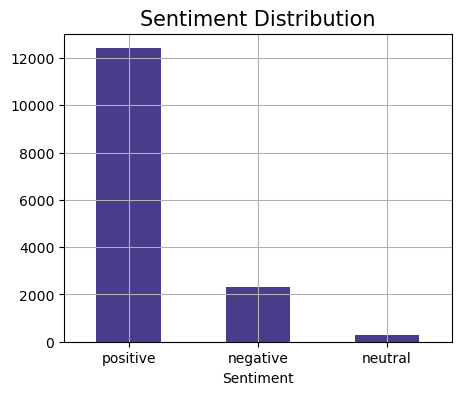

In [49]:
data['Sentiment'].value_counts().plot(kind = 'bar', figsize = (5,4), color ='darkslateblue')
plt.xticks(rotation = 'horizontal')
plt.title('Sentiment Distribution',fontsize = 15)
plt.grid()
plt.show()

**<h4>🟢Top Positive Reviews</h4>**

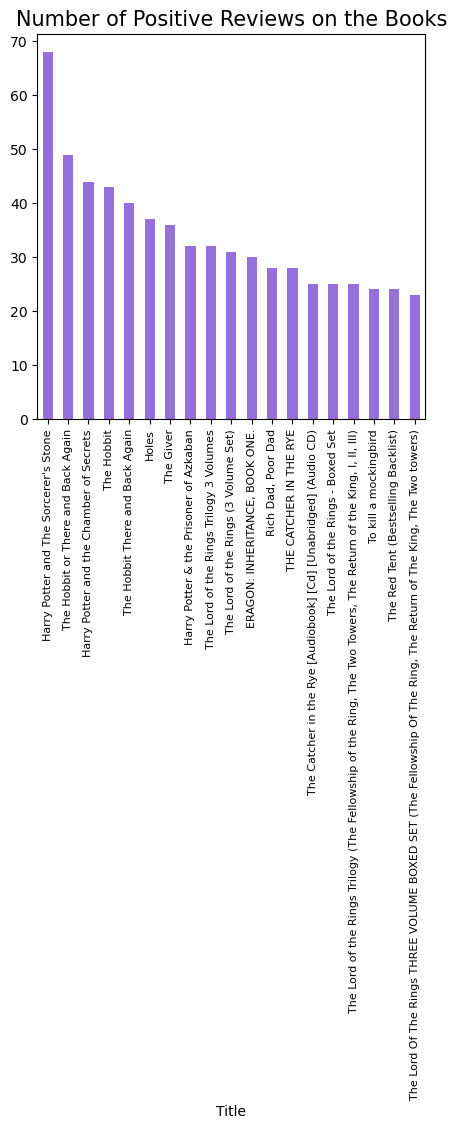

In [263]:
data[data['Sentiment'] == 'positive']['Title'].value_counts().head(19).plot(kind = 'bar', figsize = (5,5), color ='mediumpurple')
plt.title('Number of Positive Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90, fontsize=8 )
plt.show()

**<h4>🟢 Top Negative Reviews</h4>**

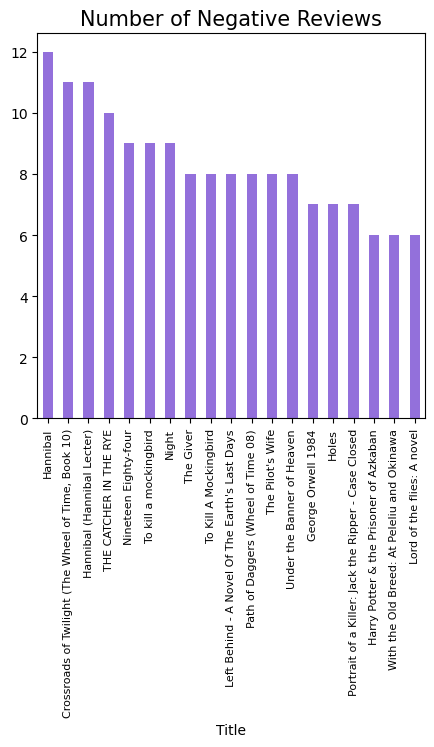

In [52]:
data[data['Sentiment'] == 'negative']['Title'].value_counts().head(19).plot(kind = 'bar', figsize = (5,5), color ='mediumpurple')
plt.title('Number of Negative Reviews',fontsize = 15)
plt.xticks(rotation = 90, fontsize=8 )
plt.show()

**<h4>🟢 Top Neutral Reviews</h4>**

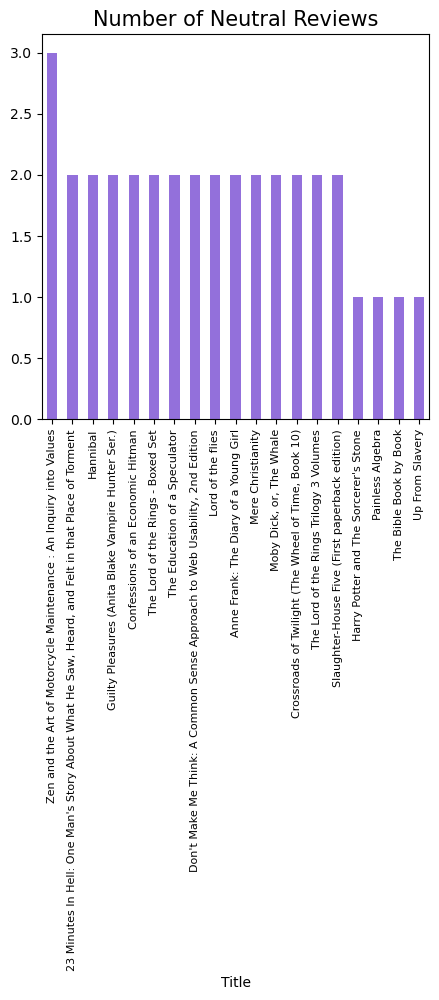

In [53]:
data[data['Sentiment'] == 'neutral']['Title'].value_counts().head(19).plot(kind = 'bar', figsize = (5,5), color ='mediumpurple')
plt.title('Number of Neutral Reviews',fontsize = 15)
plt.xticks(rotation = 90, fontsize=8 )
plt.show()

**<h3>( Reviews vs Sentiments )</h3>**

In [55]:
reviews_df = data[['clean_reviews', 'Sentiment']]

In [56]:
reviews_df.head()

,clean_reviews,Sentiment
2366645,the book is very vital. the diction and syntax...,positive
441032,"apart from the harry potter books, i've read f...",positive
1787930,it was not suitable for my purposes- i am teac...,neutral
826636,very good reading to start out with. i keep go...,positive
1040825,"during my 8th grade year, my english class rea...",positive


**Deviding data into X & Y**

In [58]:
#data(X & Y)

x = reviews_df.drop(['Sentiment'], axis=1)
y = reviews_df['Sentiment']

In [59]:
x.shape

(15000, 1)

In [60]:
y.shape

(15000,)

**<h2>Text Processing ✅</h2>**

In [62]:
#libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import nltk

In [63]:
!pip install -U nltk

In [64]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANSHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ANSHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ANSHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [65]:
#expression module-----*
import re
#stemming-----*
stemmer = nltk.SnowballStemmer("english") 
from nltk.corpus import stopwords
import string
# stopword-----*
stopword=set(stopwords.words('english'))

In [66]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import re, string, unicodedata
from string import punctuation

In [67]:
def hapus_url(text):
    return re.sub(r'http\S+','', text)

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-Z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

def lemmi(text):
    lemmatizer = WordNetLemmatizer()
    text=' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

def final_clean(text):
    final_text= []
    for i in text.split():
        if i.strip().lower() not in stopword and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

In [68]:
def clean(text):
    text = hapus_url(text)
    text = remove_special_characters(text, remove_digits=True)
    text = lemmi(text)
    text = final_clean(text)
    return text

In [69]:
import nltk
import subprocess
from nltk.corpus import wordnet

In [70]:
x["clean_reviews"] = x["clean_reviews"].apply(clean)

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

In [72]:
x_train

,clean_reviews
2298676,heinlein wrote fantastic future history book o...
261920,good quick read twin brother nothing alike exc...
1094225,know popular get artist streach limit try ever...
2060884,book entertaining bored want read lampooning i...
1417394,wa first demille book read used read tom clanc...
...,...
2396594,cause epidemic skillfully written numerous ane...
2849288,looking book tape library ran across echo deci...
1623779,overall bad choice pc based cook book ordered ...
566839,version produced national public radio long ti...


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
tfidf_vectorizer = TfidfVectorizer()  # You can adjust the max_features parameter

x_train_tfidf = tfidf_vectorizer.fit_transform(x_train['clean_reviews'])

# Transform the 'clean_reviews' column on the testing data
x_test_tfidf = tfidf_vectorizer.transform(x_test['clean_reviews'])

In [75]:
x_train_tfidf_df = pd.DataFrame(x_train_tfidf.toarray())
x_test_tfidf_df =  pd.DataFrame(x_test_tfidf.toarray())

**<h3>Balancing Data ✅</h3>**

In [77]:
#Using Smote for Balancing Data

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_bal, y_train_bal = oversample.fit_resample(x_train_tfidf, y_train)
y_train_bal.value_counts()

Sentiment
positive    9278
neutral     9278
negative    9278
Name: count, dtype: int64

In [78]:
x_test_bal, y_test_bal = oversample.fit_resample(x_test_tfidf, y_test)
y_test_bal.value_counts()

Sentiment
positive    3128
negative    3128
neutral     3128
Name: count, dtype: int64

**<h2>Model Training ✅</h2>**

**<h3>1) Logistic Regression 🟢</h3>**

In [298]:
#Applying Logistic Regression on Imbalanced Data ✔️

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [82]:
log = LogisticRegression()
log.fit(x_train_tfidf_df, y_train)

LogisticRegression()

In [83]:
perd_log=log.predict(x_test_tfidf_df)

In [84]:
print(classification_report(perd_log, y_test))

              precision    recall  f1-score   support

    negative       0.22      0.83      0.34       143
     neutral       0.00      0.00      0.00         0
    positive       0.99      0.86      0.92      3607

    accuracy                           0.86      3750
   macro avg       0.40      0.56      0.42      3750
weighted avg       0.96      0.86      0.90      3750



C:\Users\ANSHUL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ANSHUL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ANSHUL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [300]:
# logistic Regression on Balanced data ✔️

log_bal = LogisticRegression()
log_bal.fit(x_train_bal, y_train_bal)

LogisticRegression()

In [86]:
perd_log_bal =log_bal.predict(x_test_bal)

In [87]:
print(classification_report(perd_log_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.69      0.66      0.67      3259
     neutral       0.13      0.91      0.22       435
    positive       0.91      0.50      0.65      5690

    accuracy                           0.58      9384
   macro avg       0.58      0.69      0.51      9384
weighted avg       0.80      0.58      0.64      9384



In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
confusion_matrix(y_test_bal,perd_log_bal)

array([[2154,   24,  950],
       [ 846,  395, 1887],
       [ 259,   16, 2853]], dtype=int64)

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

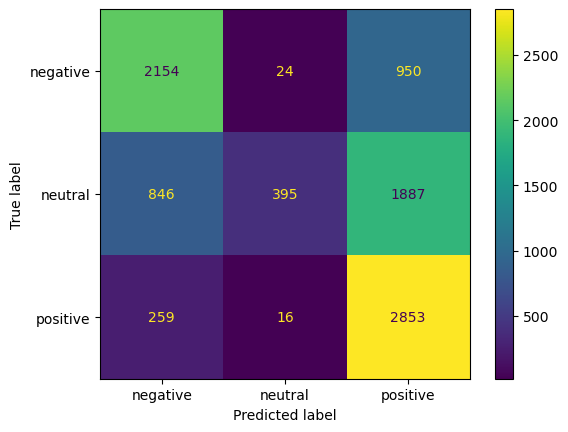

In [91]:
cm = confusion_matrix(y_test_bal, perd_log_bal, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
disp.plot()

**<h2>2) Decision Tree 🟢</h2>**

In [304]:
#Decision tree on imbalanced Data ✔️

from sklearn.tree import DecisionTreeClassifier

In [94]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=45)
classifier.fit(x_train_tfidf_df, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=45)

In [95]:
pred_tre = classifier.predict(x_test_tfidf_df)

In [96]:
print(classification_report(pred_tre, y_test))

              precision    recall  f1-score   support

    negative       0.31      0.31      0.31       542
     neutral       0.09      0.12      0.11        59
    positive       0.87      0.87      0.87      3149

    accuracy                           0.77      3750
   macro avg       0.42      0.43      0.43      3750
weighted avg       0.78      0.77      0.78      3750



In [97]:
confusion_matrix(y_test,pred_tre)

array([[ 168,   11,  369],
       [  14,    7,   53],
       [ 360,   41, 2727]], dtype=int64)

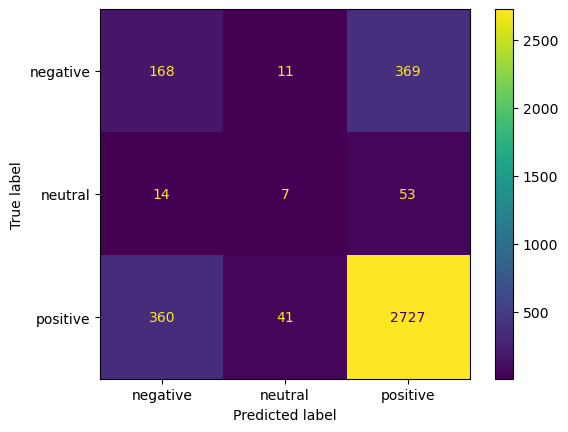

In [98]:
cm = confusion_matrix(y_test, pred_tre, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

In [306]:
# Decision tree on balanced data ✔️
classifier_bal= DecisionTreeClassifier(criterion='entropy', random_state=45)
classifier_bal.fit(x_train_bal, y_train_bal)

DecisionTreeClassifier(criterion='entropy', random_state=45)

In [100]:
pred_tre_bal = classifier_bal.predict(x_test_bal)

In [101]:
print(classification_report(pred_tre_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.52      0.54      0.53      3017
     neutral       0.19      0.72      0.30       813
    positive       0.81      0.46      0.58      5554

    accuracy                           0.51      9384
   macro avg       0.51      0.57      0.47      9384
weighted avg       0.66      0.51      0.54      9384



In [102]:
confusion_matrix(y_test_bal,pred_tre_bal)

array([[1626,  154, 1348],
       [ 869,  585, 1674],
       [ 522,   74, 2532]], dtype=int64)

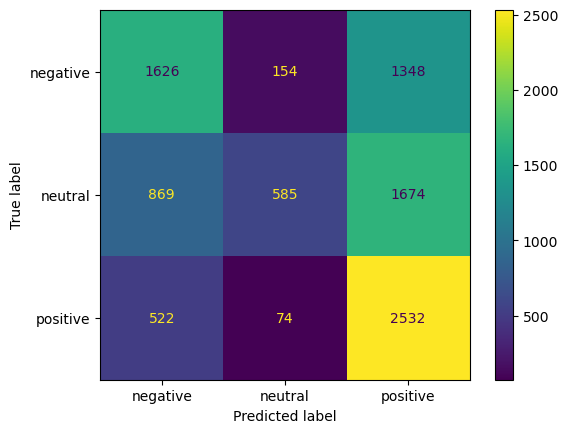

In [103]:
cm = confusion_matrix(y_test_bal, pred_tre_bal, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

**<h3>3) Naive Bayes 🟢</h3>**

In [307]:
#Naive bayes on imbalanced Data ✔️

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [106]:
nb.fit(x_train_tfidf_df, y_train)

GaussianNB()

In [107]:
pred_nb = nb.predict(x_test_tfidf_df)

In [108]:
print(classification_report(pred_nb, y_test))

              precision    recall  f1-score   support

    negative       0.28      0.14      0.19      1093
     neutral       0.09      0.09      0.09        80
    positive       0.69      0.84      0.76      2577

    accuracy                           0.62      3750
   macro avg       0.35      0.35      0.34      3750
weighted avg       0.56      0.62      0.58      3750



In [308]:
#Naive Bayes on Balanced Data ✔️
import numpy as np

# Assuming x_train_bal is your sparse matrix
x_train_bal_dense = x_train_bal.toarray()

# Then proceed with fitting the model using the dense array
nb_bal = GaussianNB()
nb_bal.fit(x_train_bal_dense, y_train_bal)

GaussianNB()

In [110]:
pred_nb_bal = nb_bal.predict(x_test_bal.toarray())

In [111]:
print(classification_report(pred_nb_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.20      0.23      0.21      2702
     neutral       0.03      0.54      0.06       167
    positive       0.69      0.33      0.45      6515

    accuracy                           0.31      9384
   macro avg       0.31      0.37      0.24      9384
weighted avg       0.54      0.31      0.37      9384



**<h3>4) RandomForest 🟢</h3>**

In [296]:
#RandomForest on Imbalanced Data ✔️

from sklearn.ensemble import RandomForestClassifier

In [114]:
x_train_tfidf_df.shape

(11250, 63431)

In [115]:
x_test_tfidf_df.shape

(3750, 63431)

In [116]:
ran=RandomForestClassifier(n_estimators=100)
ran.fit(x_train_tfidf_df,y_train)

RandomForestClassifier()

In [117]:
perd_ran=ran.predict(x_test_tfidf_df)

In [118]:
perd_ran.shape

(3750,)

In [119]:
confusion_matrix(y_test,perd_ran)

array([[   9,    0,  539],
       [   0,    1,   73],
       [   2,    0, 3126]], dtype=int64)

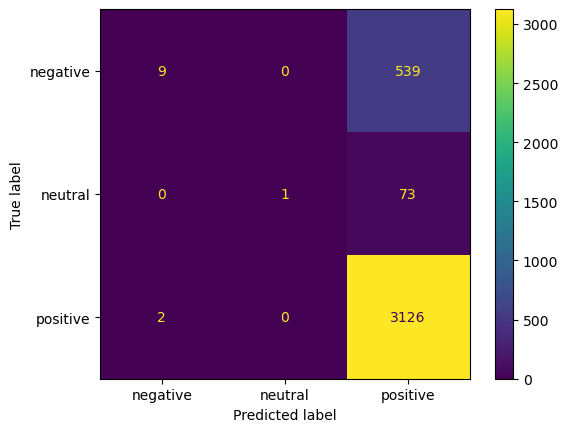

In [120]:
cm = confusion_matrix(y_test, perd_ran, labels=ran.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ran.classes_)
disp.plot()

In [121]:
y_test.shape , perd_ran.shape

((3750,), (3750,))

In [122]:
print(classification_report(perd_ran, y_test))

              precision    recall  f1-score   support

    negative       0.02      0.82      0.03        11
     neutral       0.01      1.00      0.03         1
    positive       1.00      0.84      0.91      3738

    accuracy                           0.84      3750
   macro avg       0.34      0.88      0.32      3750
weighted avg       1.00      0.84      0.91      3750



In [309]:
# RandomForest on balanced Data ✔️

ran_bal=RandomForestClassifier(n_estimators=100)
ran_bal.fit(x_train_bal,y_train_bal)
perd_ran_bal=ran_bal.predict(x_test_bal)

In [124]:
confusion_matrix(y_test_bal,perd_ran_bal)

array([[1331,    0, 1797],
       [  72,   87, 2969],
       [ 135,    0, 2993]], dtype=int64)

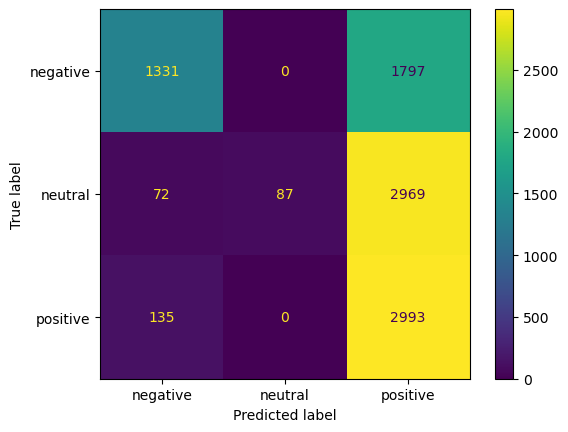

In [125]:
cm = confusion_matrix(y_test_bal, perd_ran_bal, labels=ran.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ran.classes_)
disp.plot()

**<h2>Saving best model ✅</h2>**

In [228]:
import pickle

In [230]:
pickle.dump(log_bal, open('log_bal.pkl','wb'))

In [232]:
with open('log_bal','wb') as f:
  pickle.dump(log_bal,f)

In [234]:
with open('log_bal','rb') as f:
  mp=pickle.load(f)

In [236]:
def predict(text):
  input_text = [text]
  text_to_vec = tfidf_vectorizer.transform(input_text).toarray() 
  prediction = mp.predict(text_to_vec)
  return prediction

In [238]:
User_input = input("Enter your text:")
output = predict(User_input)
print(output)

Enter your text: neutral


['positive']
